In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from openai import OpenAI
from googlesearch import search
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import f1_score



In [175]:
data = pd.read_csv('../../data/model_features.csv')
df = data.copy()
#drop_columns = ['team', 'opponent', 'team_score', 'opponent_score', 'team_rank', 'opponent_rank', 'game_round', 'season_type', 'date', 'season_year', 'conf_opp', 'conf', 'plus_minus']
#df = df.drop(columns=drop_columns)
df.fillna(0,inplace=True)
print(len(df.columns))

84


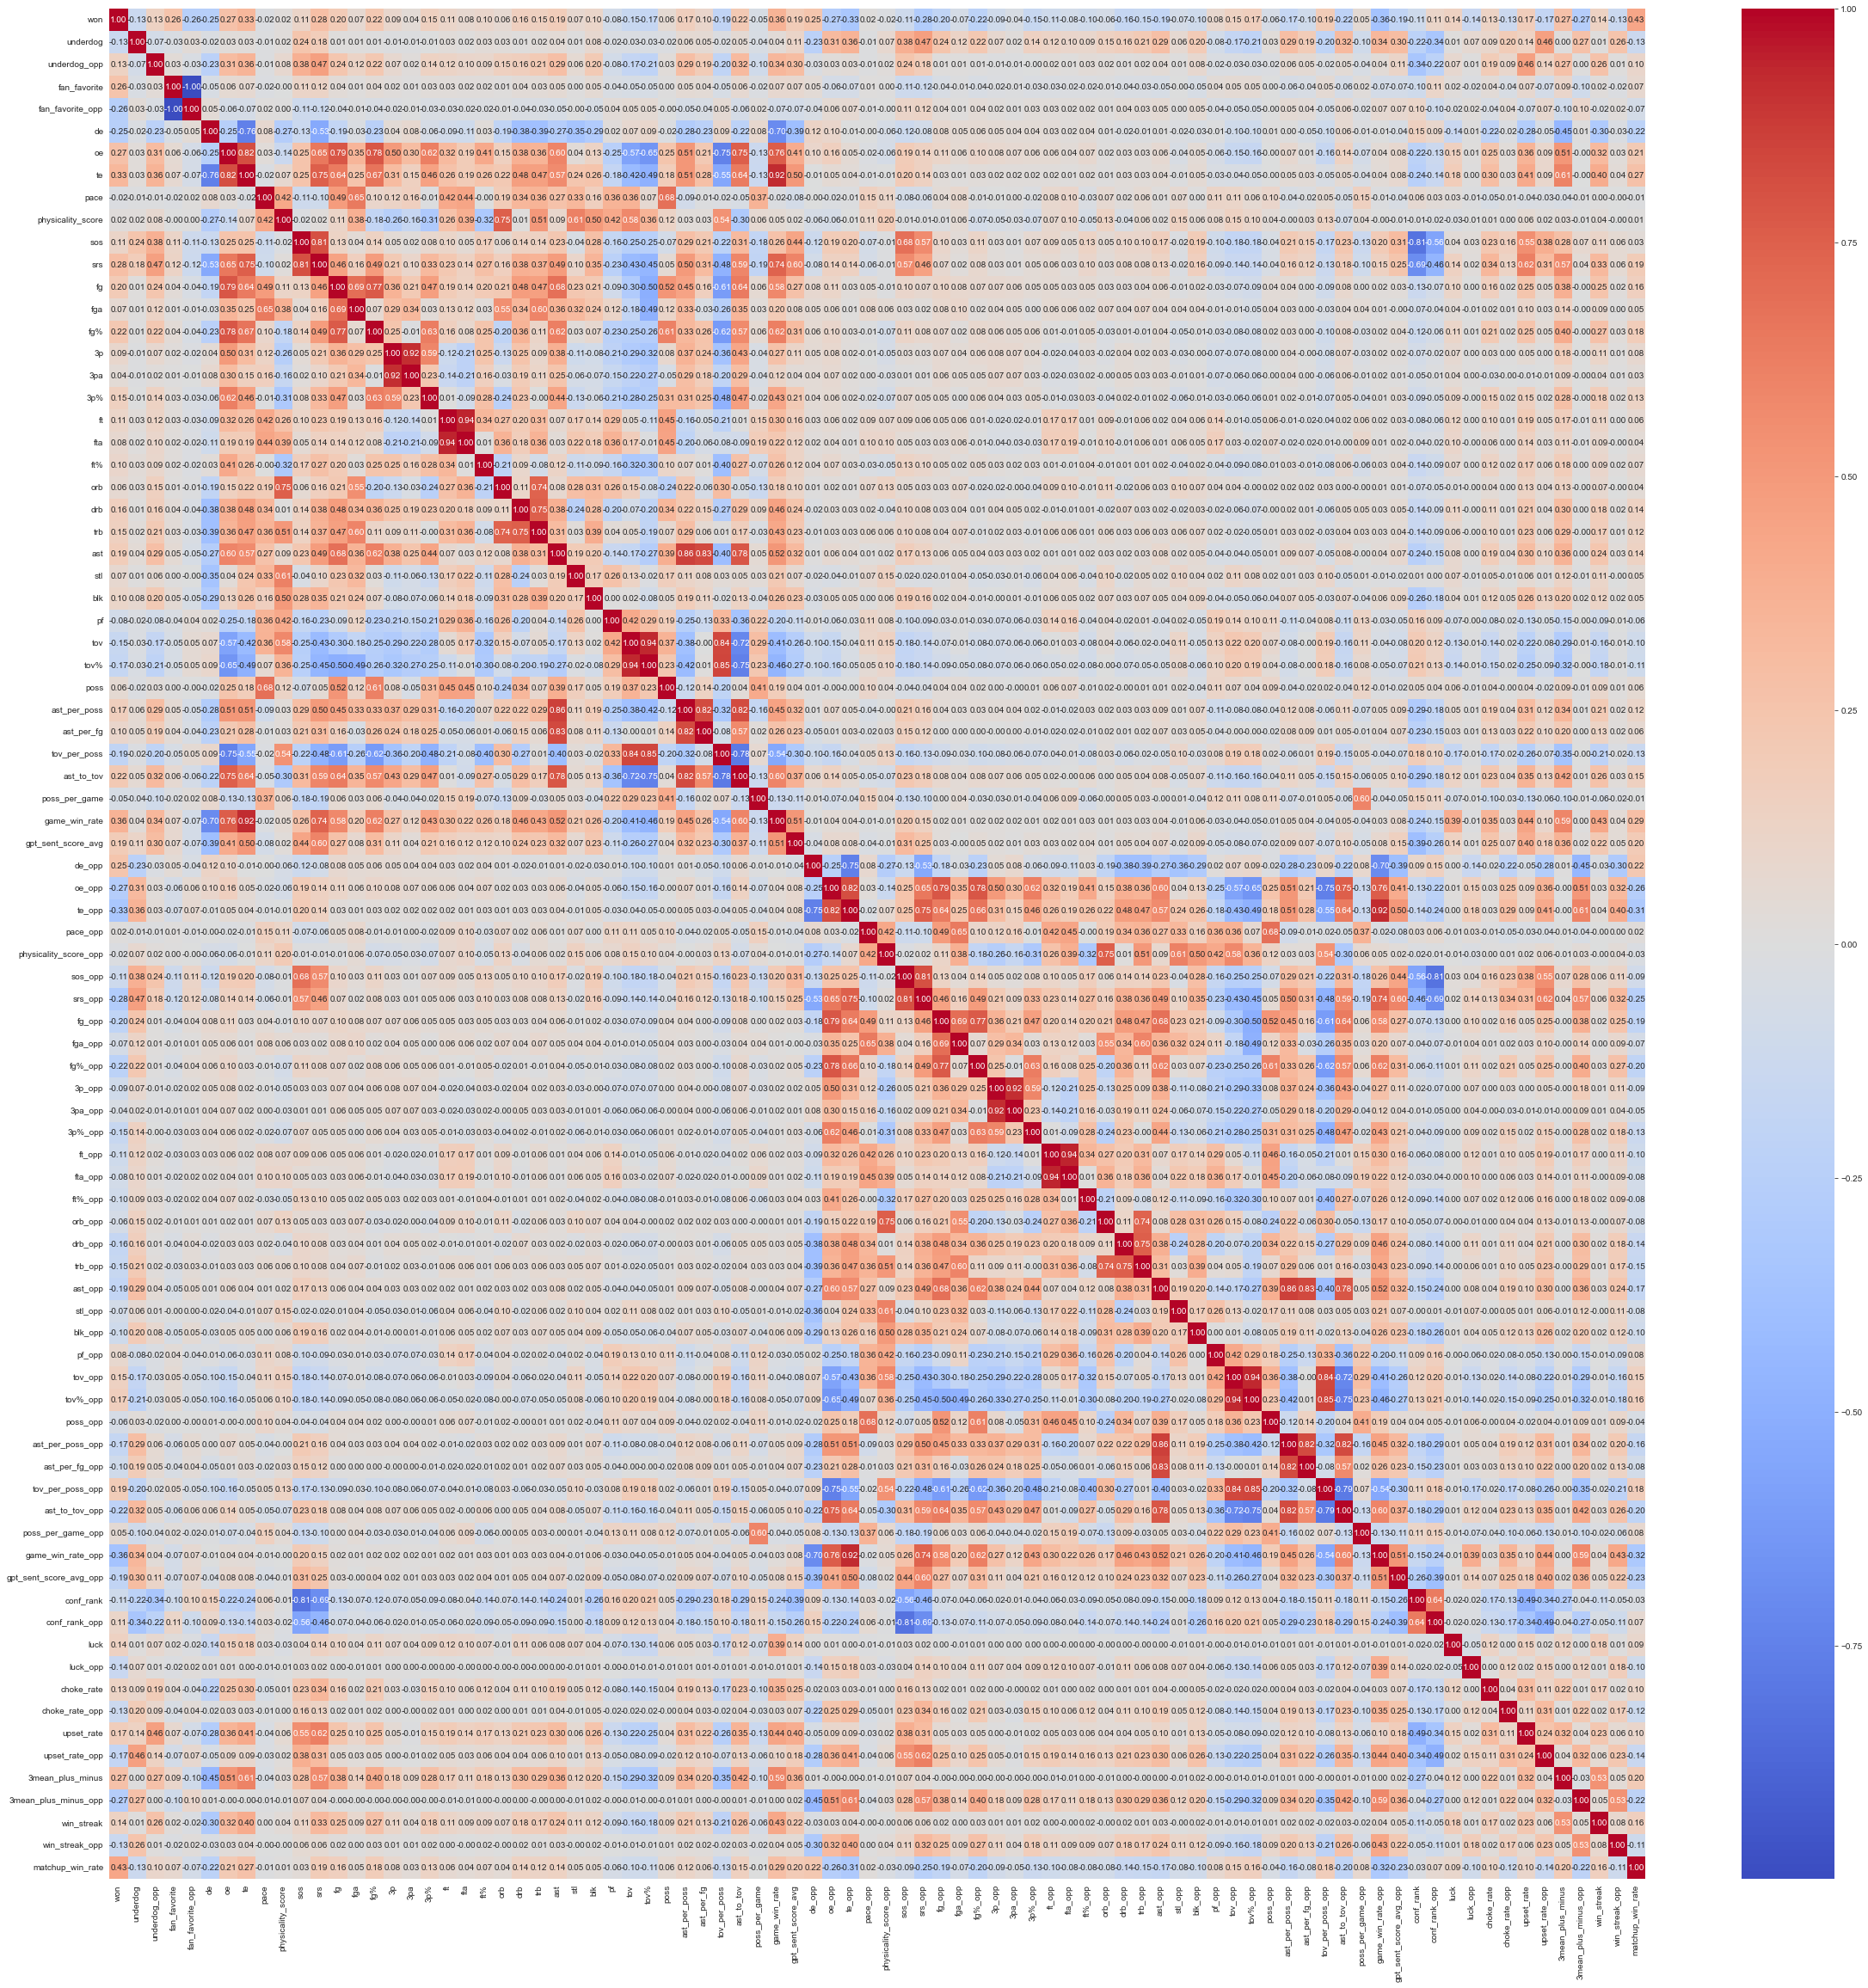

won                     1.000000
matchup_win_rate        0.431429
game_win_rate           0.363530
te                      0.331044
srs                     0.284493
                          ...   
3mean_plus_minus_opp   -0.268399
oe_opp                 -0.271804
srs_opp                -0.282931
te_opp                 -0.329701
game_win_rate_opp      -0.362397
Name: won, Length: 84, dtype: float64


In [176]:
#perform correlation analysis
def corr_analysis(df):
    correlation_matrix = df.corr(method='pearson')
    #sns.set_style("dark")
    #sns.color_palette("rocket")

    plt.figure(figsize=(40, 40))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.show()
    correlation_with_target = correlation_matrix["won"].sort_values(ascending=False)
    print(correlation_with_target)

corr_analysis(df)

In [106]:
#performs logisitc regression based on the specific NCAA dataset
def log_model(df):
    y = df.iloc[:, 0] #selects the first column (wins)

    X = df.iloc[:, 1:] #selects all columns except the win column

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    

log_model(df)

Confusion Matrix:
[[3207  812]
 [ 880 3029]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      4019
           1       0.79      0.77      0.78      3909

    accuracy                           0.79      7928
   macro avg       0.79      0.79      0.79      7928
weighted avg       0.79      0.79      0.79      7928



/Users/christopherorem/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
def xgboost(df):
    y = df.iloc[:, 0] #selects the first column (wins)

    X = df.iloc[:, 1:] #selects all columns except the win column

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    xgb_clf = XGBClassifier(objective='binary:logistic', n_estimators=100, seed=42)

    xgb_clf.fit(X_train, y_train)
    
    y_pred = xgb_clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

xgboost(df)

Accuracy: 76.48%


In [127]:
#feature_reduction_list = ['won', 'underdog', 'underdog_opp', 'w', 'l', 'de', 'oe', 'te', 'sos', 'srs', 'fg', 'fga', 'fg%', '3p', '3p%', 'drb', 'trb', 'ast', 'tov', 'tov%', 'ast_per_poss', 'ast_per_fg', 'tov_per_poss', 'ast_to_tov', 'game_win_rate', 'w_opp', 'l_opp', 'de_opp', 'oe_opp', 'te_opp', 'sos_opp', 'srs_opp', 'fg_opp', 'fga_opp', 'fg%_opp', '3p_opp', '3p%_opp', 'ft%_opp', 'drb_opp', 'trb_opp', 'ast_opp', 'tov_opp', 'tov%_opp', 'ast_per_poss_opp', 'ast_per_fg_opp', 'tov_per_poss_opp', 'ast_to_tov_opp', 'game_win_rate_opp', 'conf_rank', 'conf_rank_opp', 'choke_rate', 'choke_rate_opp', 'upset_rate', 'upset_rate_opp', '3mean_plus_minus', '3mean_plus_minus_opp', 'win_streak', 'win_streak_opp', 'gpt_sent_score_avg', 'gpt_sent_score_avg_opp']
#df = df[feature_reduction_list]

df.head()

,won,underdog,underdog_opp,fan_favorite,fan_favorite_opp,de,oe,te,pace,physicality_score,...,luck_opp,choke_rate,choke_rate_opp,upset_rate,upset_rate_opp,3mean_plus_minus,3mean_plus_minus_opp,win_streak,win_streak_opp,matchup_win_rate
0,1,0,0,1,0,83.955939,105.172414,1.25271,72.0,9.405172,...,0.000000,0.0,NaN,0.0,NaN,14.333333,-3.333333,0,0,NaN
1,1,0,0,0,1,83.955939,105.172414,1.25271,72.0,9.405172,...,0.571429,0.0,NaN,0.0,NaN,14.333333,-0.333333,1,2,NaN
2,1,0,0,1,0,83.955939,105.172414,1.25271,72.0,9.405172,...,0.444444,0.0,NaN,0.0,0.000000,14.333333,-5.666667,2,1,NaN
3,1,0,0,1,0,83.955939,105.172414,1.25271,72.0,9.405172,...,0.000000,0.0,NaN,0.0,NaN,14.333333,-10.333333,3,0,0.5
4,0,1,0,0,1,83.955939,105.172414,1.25271,72.0,9.405172,...,0.333333,0.0,0.3,0.0,0.444444,13.666667,21.333333,4,2,NaN


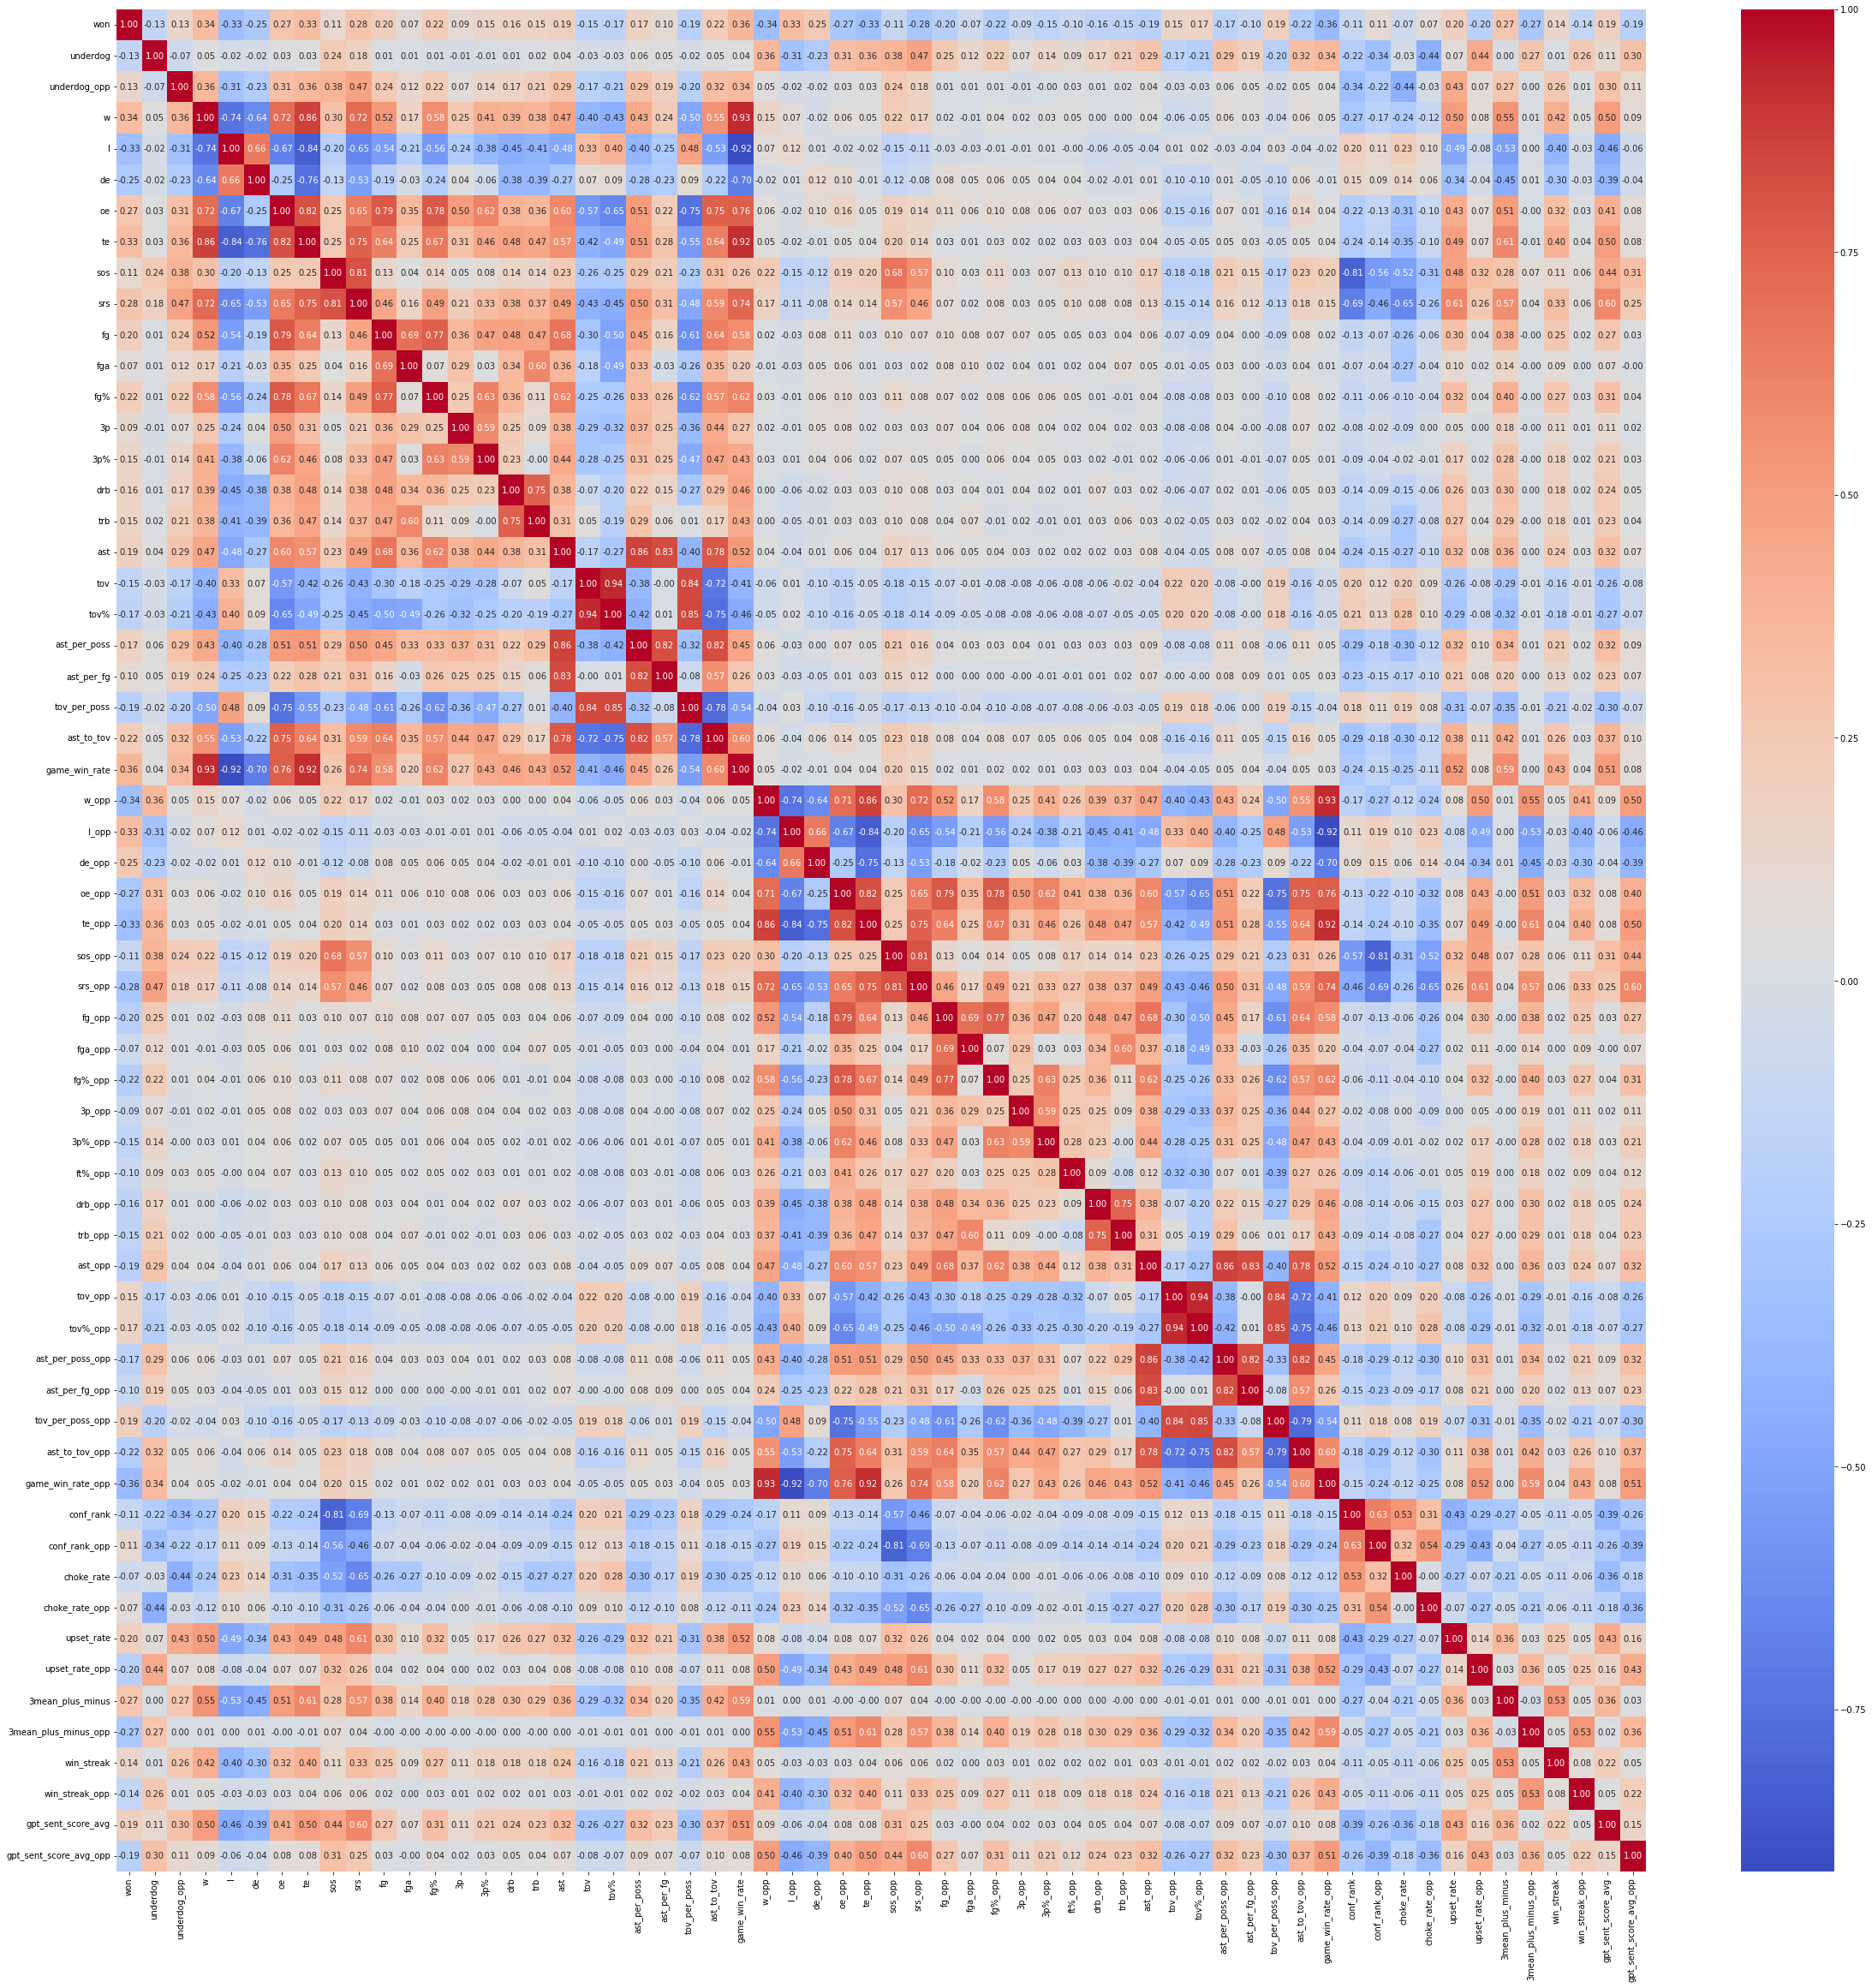

won                       1.000000
game_win_rate             0.363833
w                         0.338688
l_opp                     0.333527
te                        0.331184
srs                       0.284325
oe                        0.272797
3mean_plus_minus          0.268123
de_opp                    0.249606
fg%                       0.220589
ast_to_tov                0.216928
fg                        0.203057
upset_rate                0.197324
gpt_sent_score_avg        0.192853
tov_per_poss_opp          0.192413
ast                       0.187046
ast_per_poss              0.169268
tov%_opp                  0.167277
drb                       0.164805
trb                       0.154596
3p%                       0.153604
tov_opp                   0.149896
win_streak                0.136723
underdog_opp              0.134180
sos                       0.113684
conf_rank_opp             0.106486
ast_per_fg                0.099015
3p                        0.094326
fga                 

In [ ]:
corr_analysis(df)

In [167]:
def log_tuning(df):
    
    y = df.iloc[:, 0] #selects the first column (wins)
    X = df.iloc[:, 1:] #selects all columns except the win column

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
    }
    logreg = LogisticRegression(max_iter=1000)

    # Initialize the GridSearchCV
    grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Best parameters and best score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Calculate and print ROC-AUC score
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

    return grid_search

model = log_tuning(df)

/Users/christopherorem/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/christopherorem/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/christopherorem/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/christopherorem/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/christopherorem/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

KeyboardInterrupt: 

In [80]:
def xgboost_tuned(df):
    y = df.iloc[:, 0] #selects the first column (wins)

    X = df.iloc[:, 1:] #selects all columns except the win column

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBClassifier(objective='binary:logistic', n_estimators=100, seed=42)

    param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    #'gamma': [0.5, 1, 1.5, 2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2]
    }

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

    grid_search.fit(X_train, y_train)

    # Best parameters and best score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Calculate and print ROC-AUC score
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

    return grid_search

xgboost_tuned(df)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
Best score: 0.7549353516240934
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      4019
           1       0.74      0.75      0.75      3909

    accuracy                           0.75      7928
   macro avg       0.75      0.75      0.75      7928
weighted avg       0.75      0.75      0.75      7928

ROC-AUC Score: 0.8319212634842519


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=1)